Final Dataset Link: https://drive.google.com/file/d/14KpYro56AbayWBQZ6CJfootZ-lC_SseK/view?usp=sharing

# Import Packages

In [ ]:
# install the gdown package in Colab
!pip install gdown
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
from sklearn.neighbors import KernelDensity

# Import Dataset


In [ ]:
#Set viewing permission to 'Anyone with the link' if not already done
#File ID from the Google Drive link -> https://drive.google.com/file/d/FILE_ID/view?usp=sharing
file_id = '14KpYro56AbayWBQZ6CJfootZ-lC_SseK'
url = f'https://drive.google.com/uc?id={file_id}'

#Download the file and save the name of the file
Toronto_Collisions = 'Toronto_Collisions.csv'
gdown.download(url, Toronto_Collisions, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14KpYro56AbayWBQZ6CJfootZ-lC_SseK
To: /content/Toronto_Collisions.csv
100%|██████████| 21.2M/21.2M [00:00<00:00, 61.6MB/s]


'Toronto_Collisions.csv'

In [ ]:
#Read CSV file
Toronto_Collisions_df = pd.read_csv(Toronto_Collisions)
Toronto_Collisions_df.head()

OCC_DATE OCC_MONTH    OCC_DOW  OCC_YEAR  OCC_HOUR  COLLISION_LONGITUDE  \
0  2020-01-01   January  Wednesday      2020       6.0           -79.197483   
1  2020-01-01   January  Wednesday      2020       1.0           -79.550892   
2  2020-01-01   January  Wednesday      2020       5.0           -79.336669   
3  2020-01-01   January  Wednesday      2020       2.0           -79.393760   
4  2020-01-01   January  Wednesday      2020       4.0           -79.312104   

   COLLISION_LATITUDE  INTERSECTION_ID INTERSECTION_CLASSIFICATION  \
0           43.758945         13448608                       MNRSL   
1           43.677196         13462655                       MJRSL   
2           43.797327         13443799                       MNRSL   
3           43.642772         13467856                       MNRSL   
4           43.748833         13450356                       MNRSL   

   RED_LIGHT_CAMERA  Temp (°C)  Rel Hum (%)  Precip. Amount (mm)  \
0                 0       -0.6         73.0                  0.0   
1                 0       -0.1         70.0                  0.0   
2                 0       -0.5         72.0                  0.2   
3                 0       -0.1         67.0                  0.0   
4                 0       -0.7         75.0                  0.0   

   Visibility (km)  Stn Press (kPa)  SPD_KM  NUM_TRAFFIC_SIGNALS  
0             16.1            98.99      40                  1.0  
1             16.1            98.84      60                  1.0  
2             16.1            98.96      40                  0.0  
3             16.1            98.87      60                  1.0  
4             16.1            98.96      60                  0.0

# EDA

In [ ]:
#Basic information about the DataFrame
Toronto_Collisions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183617 entries, 0 to 183616
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OCC_DATE                     183617 non-null  object 
 1   OCC_MONTH                    183617 non-null  object 
 2   OCC_DOW                      183617 non-null  object 
 3   OCC_YEAR                     183617 non-null  int64  
 4   OCC_HOUR                     183617 non-null  float64
 5   COLLISION_LONGITUDE          183617 non-null  float64
 6   COLLISION_LATITUDE           183617 non-null  float64
 7   INTERSECTION_ID              183617 non-null  int64  
 8   INTERSECTION_CLASSIFICATION  183617 non-null  object 
 9   RED_LIGHT_CAMERA             183617 non-null  int64  
 10  Temp (°C)                    183617 non-null  float64
 11  Rel Hum (%)                  183617 non-null  float64
 12  Precip. Amount (mm)          183617 non-null  float64
 13 

In [ ]:
#Get summary statistics for numeric columns
Toronto_Collisions_df.describe()

OCC_YEAR       OCC_HOUR  COLLISION_LONGITUDE  COLLISION_LATITUDE  \
count  183617.000000  183617.000000        183617.000000       183617.000000   
mean     2021.714520      13.610276           -79.394290           43.711893   
std         1.119792       4.900579             0.101886            0.054314   
min      2020.000000       1.000000           -79.639247           43.586487   
25%      2021.000000      10.000000           -79.467595           43.664219   
50%      2022.000000      14.000000           -79.392136           43.710815   
75%      2023.000000      17.000000           -79.317764           43.757767   
max      2023.000000      23.000000           -79.122044           43.847000   

       INTERSECTION_ID  RED_LIGHT_CAMERA      Temp (°C)    Rel Hum (%)  \
count     1.836170e+05     183617.000000  183617.000000  183617.000000   
mean      1.380731e+07          0.138010      11.382007      62.485059   
std       2.151395e+06          0.344912      10.568464      16.976606   
min       1.344159e+07          0.000000     -20.300000      12.000000   
25%       1.344971e+07          0.000000       2.600000      51.000000   
50%       1.345760e+07          0.000000      11.300000      62.000000   
75%       1.346572e+07          0.000000      20.800000      75.000000   
max       3.014317e+07          1.000000      35.400000      98.000000   

       Precip. Amount (mm)  Visibility (km)  Stn Press (kPa)         SPD_KM  \
count        183617.000000    183617.000000    183617.000000  183617.000000   
mean              0.122178        15.091819       100.220166      52.955119   
std               0.654185         3.187943         0.792690      12.921868   
min               0.000000         0.000000        96.590000      30.000000   
25%               0.000000        16.100000        99.720000      40.000000   
50%               0.000000        16.100000       100.230000      60.000000   
75%               0.000000        16.100000       100.740000      60.000000   
max              20.500000        24.100000       103.160000     100.000000   

       NUM_TRAFFIC_SIGNALS  
count        183617.000000  
mean              0.663876  
std               0.492599  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max               3.000000

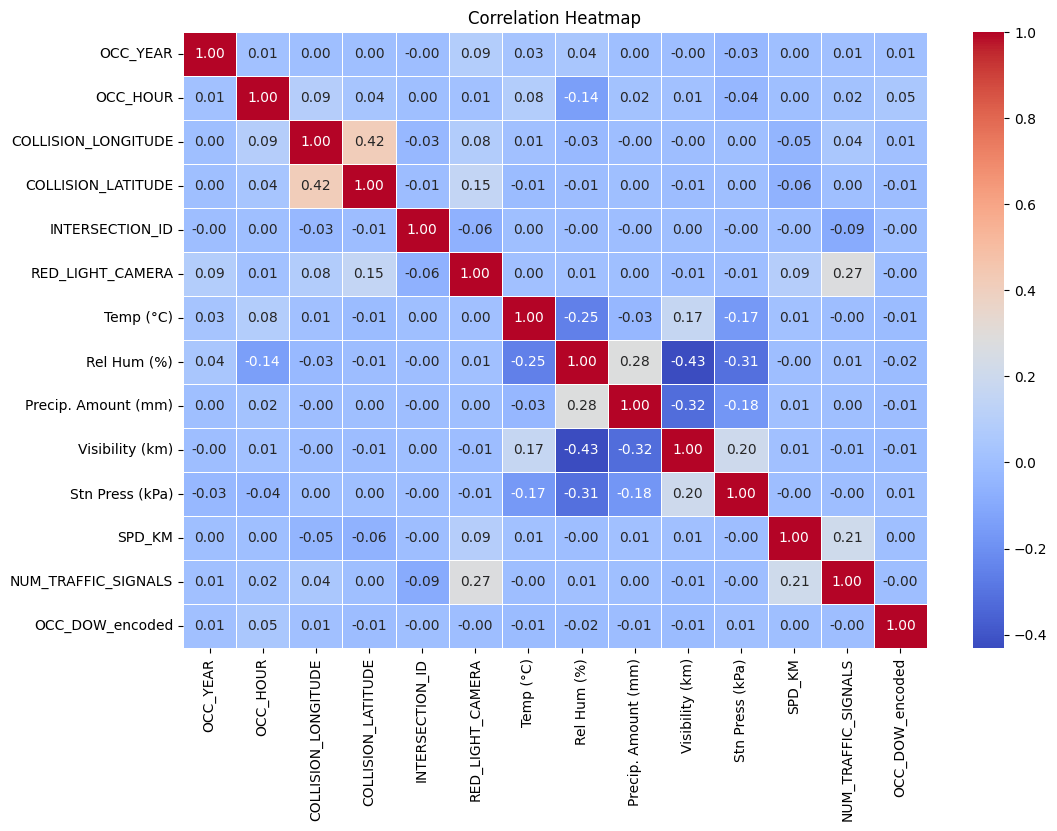

In [ ]:
#Mapping OCC_DOW (day of the week) to numeric values
dow_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

#Apply the mapping
Toronto_Collisions_df['OCC_DOW_encoded'] = Toronto_Collisions_df['OCC_DOW'].map(dow_mapping)

#Select only numeric columns for correlation
numeric_df = Toronto_Collisions_df.select_dtypes(include=['float64', 'int64'])

#Calculate correlation matrix
correlation_matrix = numeric_df.corr()

#Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

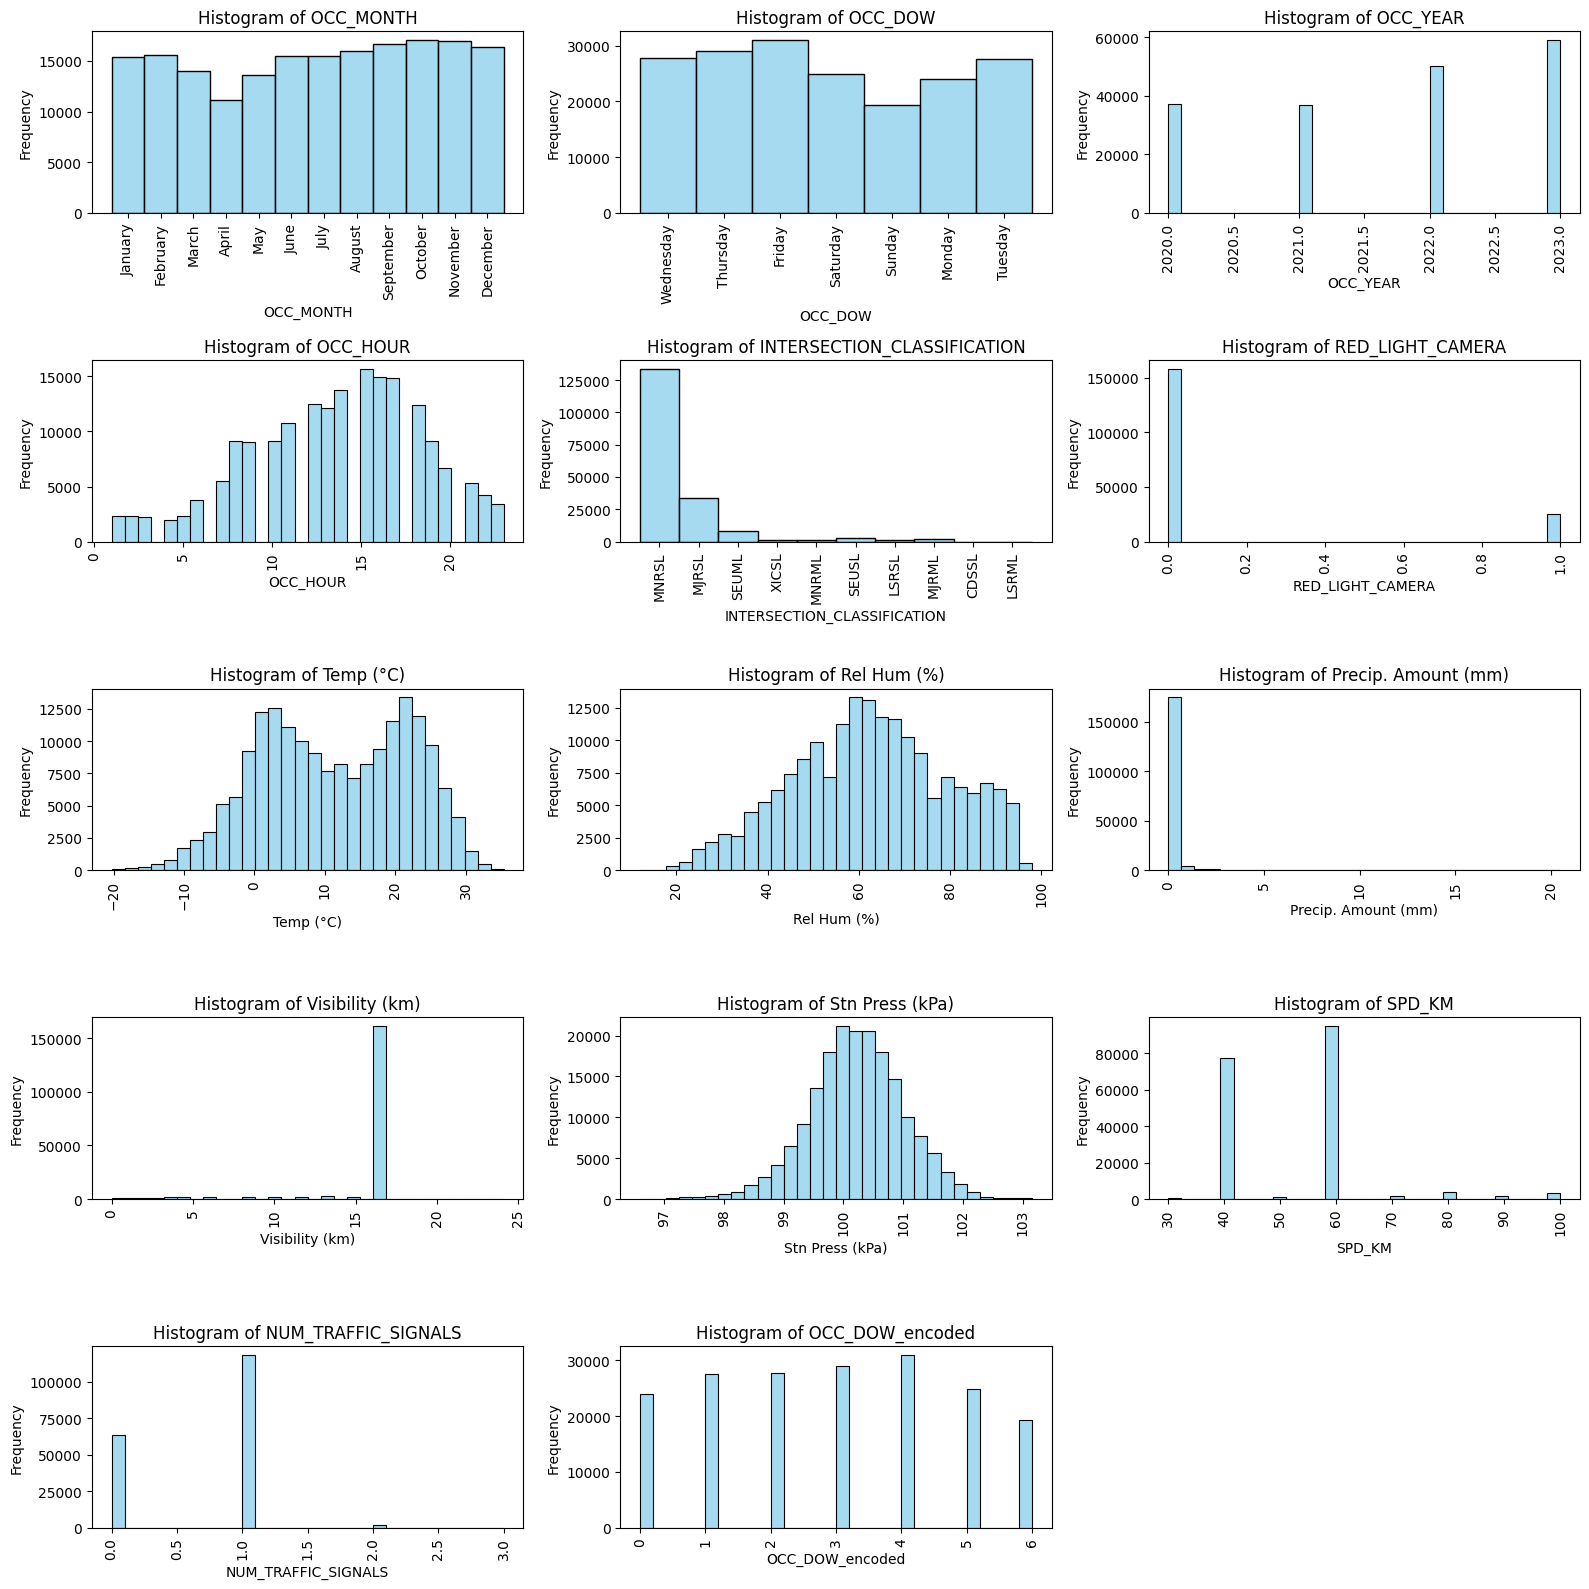

In [ ]:
#List of columns to exclude (longitude, latitude, intersection_id)
exclude_columns = ['COLLISION_LONGITUDE', 'COLLISION_LATITUDE', 'INTERSECTION_ID', 'OCC_DATE']

#Set up the plot size
plt.figure(figsize=(16, 16))

#Loop through each feature, skipping the excluded ones
plot_index = 1  # Index for subplot positioning
for column in Toronto_Collisions_df.columns:
    if column not in exclude_columns:
        plt.subplot(5, 3, plot_index)  # Adjusted grid layout for spacing (5 rows, 3 columns)
        sns.histplot(Toronto_Collisions_df[column], bins=30, color='skyblue', kde=False)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel('Frequency')

        #Rotate x-axis labels to 90 degrees
        plt.xticks(rotation=90)

        plot_index += 1

#Adjust layout and spacing to prevent overlap
plt.tight_layout()

#Show the plot
plt.show()


<ipython-input-8-e51856633d3a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Toronto_Collisions_df, x='OCC_HOUR', palette='coolwarm')
<ipython-input-8-e51856633d3a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Toronto_Collisions_df, x='OCC_DOW', palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
<ipython-input-8-e51856633d3a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Toronto_Collisions_df, x='OCC_MONTH', palette='coolwarm', order=['January', 'February

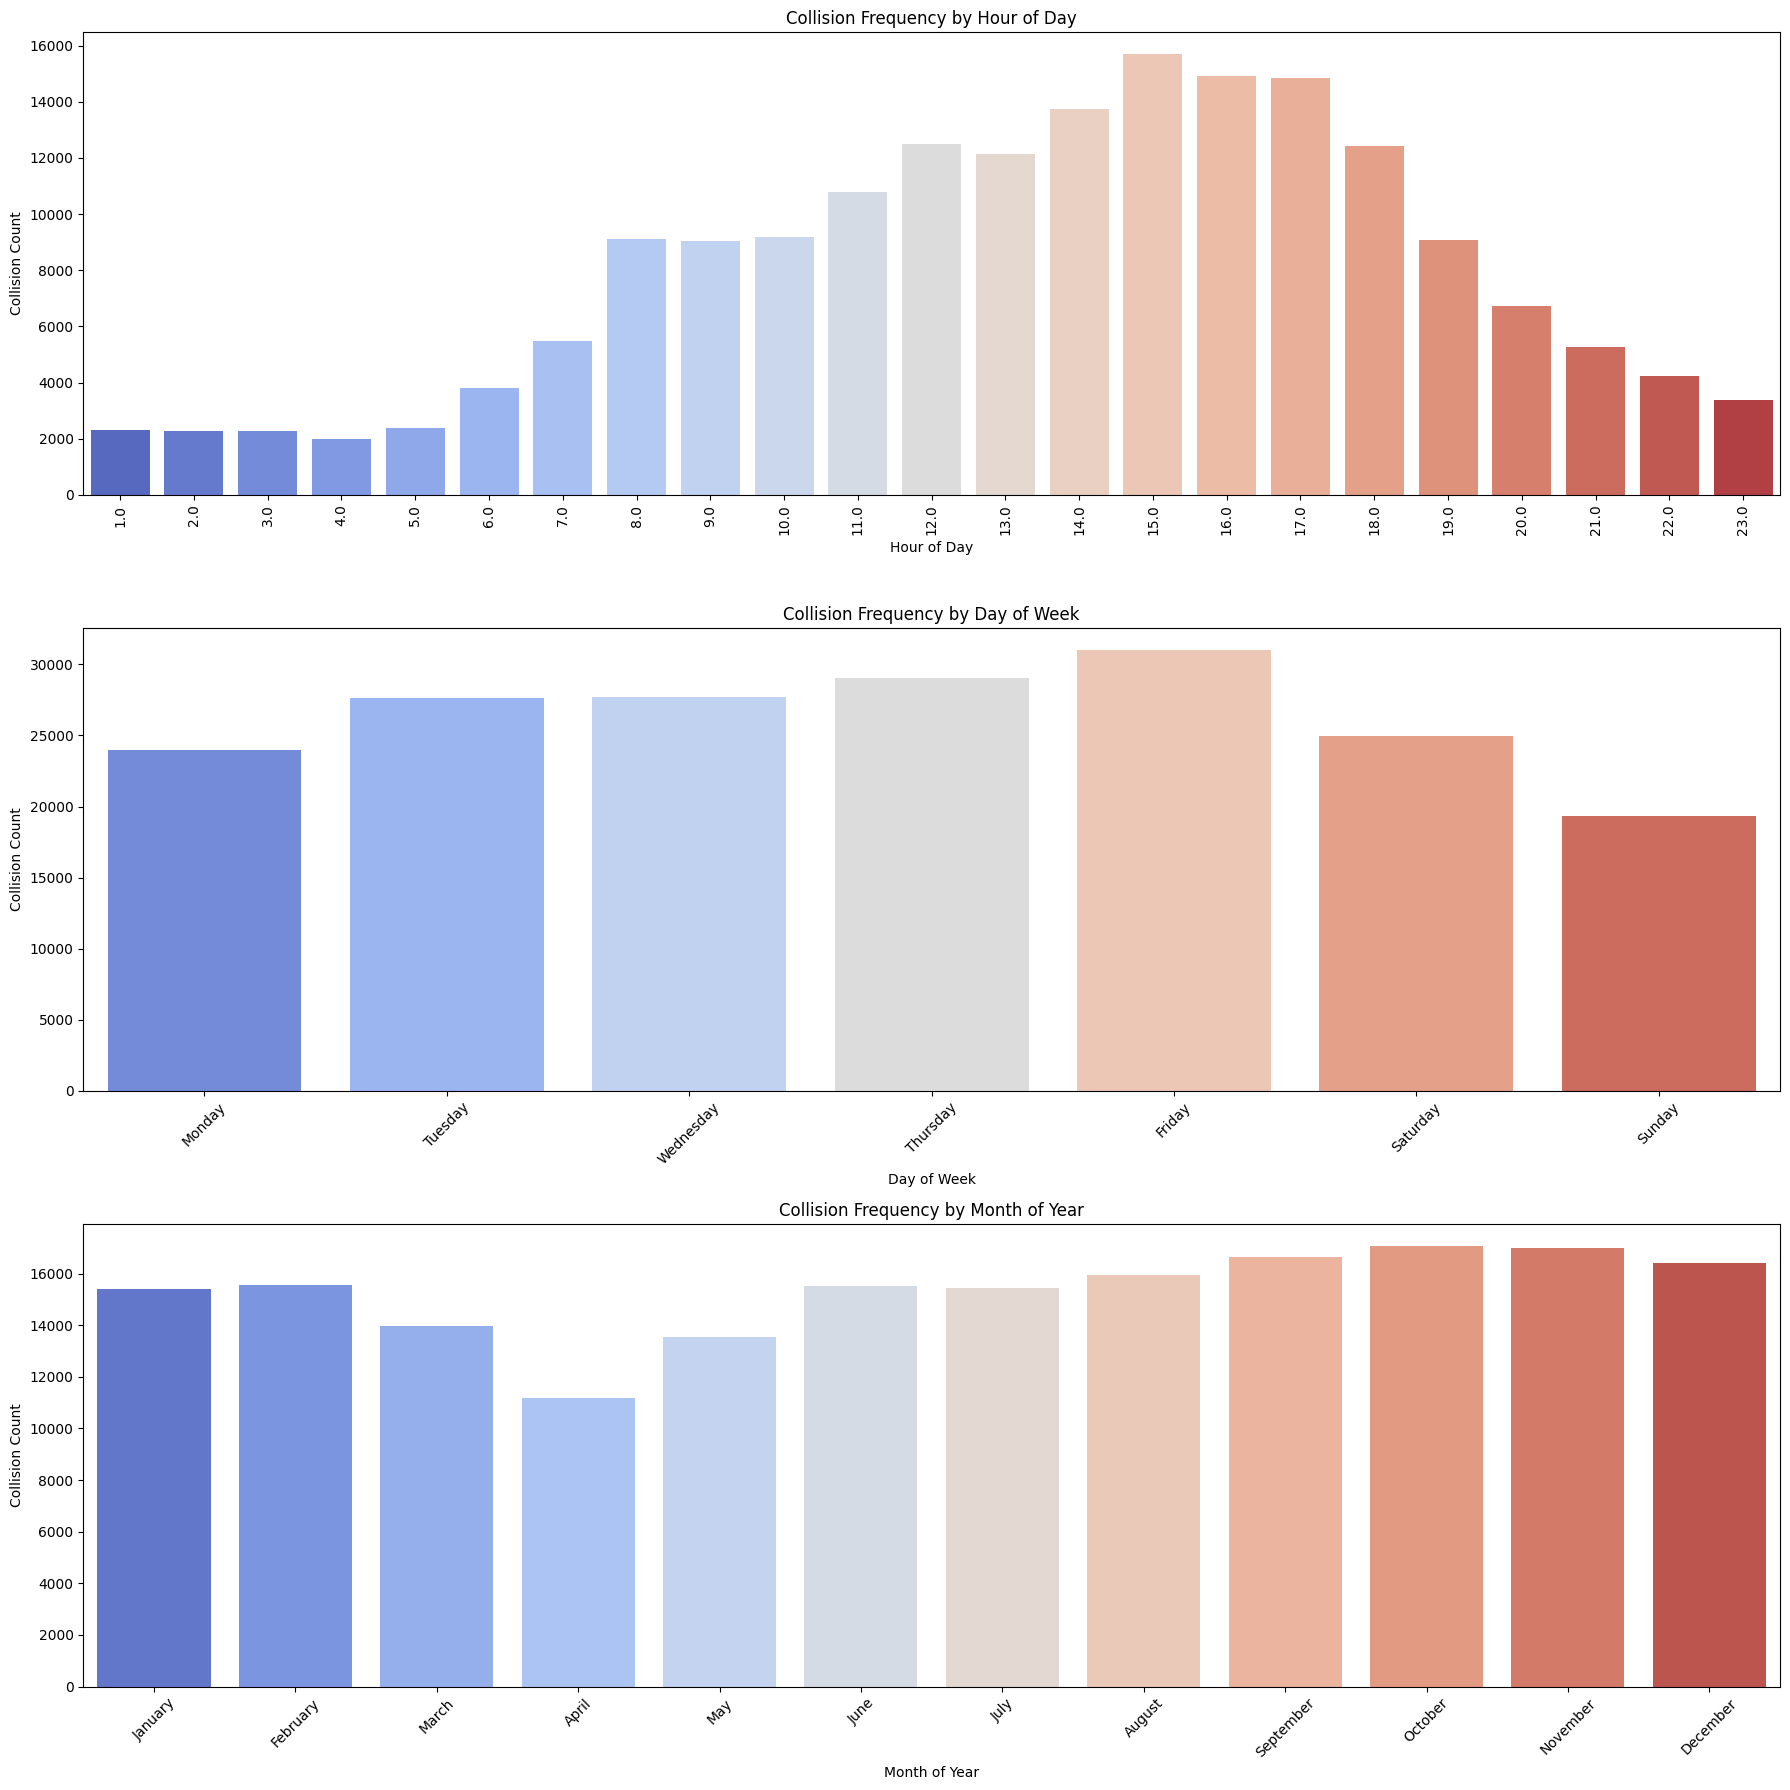

In [ ]:
#Set up the plot size
plt.figure(figsize=(18, 18))

#Plot for Hour of Day
plt.subplot(3, 1, 1)
sns.countplot(data=Toronto_Collisions_df, x='OCC_HOUR', palette='coolwarm')
plt.title("Collision Frequency by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Collision Count")
plt.xticks(rotation=90)

#Plot for Day of Week
plt.subplot(3, 1, 2)
sns.countplot(data=Toronto_Collisions_df, x='OCC_DOW', palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Collision Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Collision Count")
plt.xticks(rotation=45)

#Plot for Month of Year
plt.subplot(3, 1, 3)
sns.countplot(data=Toronto_Collisions_df, x='OCC_MONTH', palette='coolwarm', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Collision Frequency by Month of Year")
plt.xlabel("Month of Year")
plt.ylabel("Collision Count")
plt.xticks(rotation=45)

#Adjust layout for spacing
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-9-d0499a0b32d7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Toronto_Collisions_df, x='Season', palette='coolwarm')


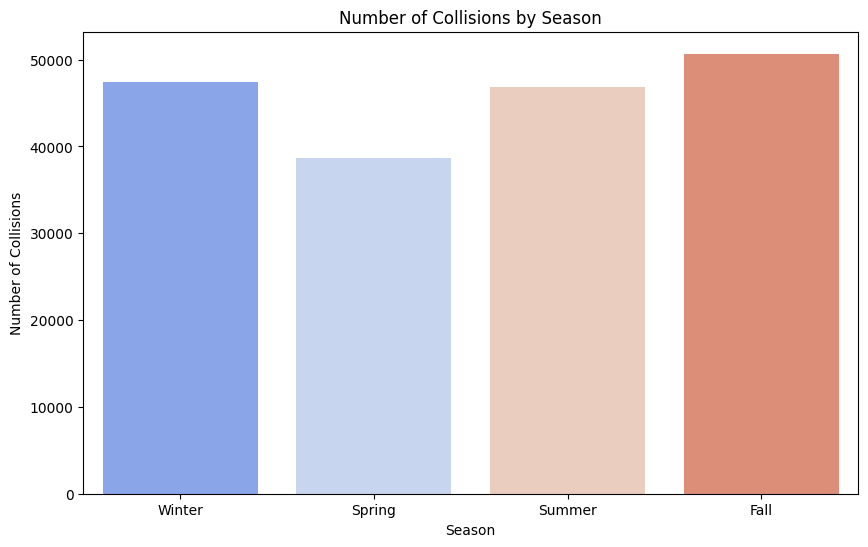

In [ ]:
#Map month names to seasons
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',   # Winter
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',              # Spring
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',            # Summer
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'         # Fall
}

#Create a new column 'Season' based on the OCC_MONTH
Toronto_Collisions_df['Season'] = Toronto_Collisions_df['OCC_MONTH'].map(season_map)

#Plot collision counts by season
plt.figure(figsize=(10, 6))
sns.countplot(data=Toronto_Collisions_df, x='Season', palette='coolwarm')
plt.title('Number of Collisions by Season')
plt.xlabel('Season')
plt.ylabel('Number of Collisions')
plt.show()

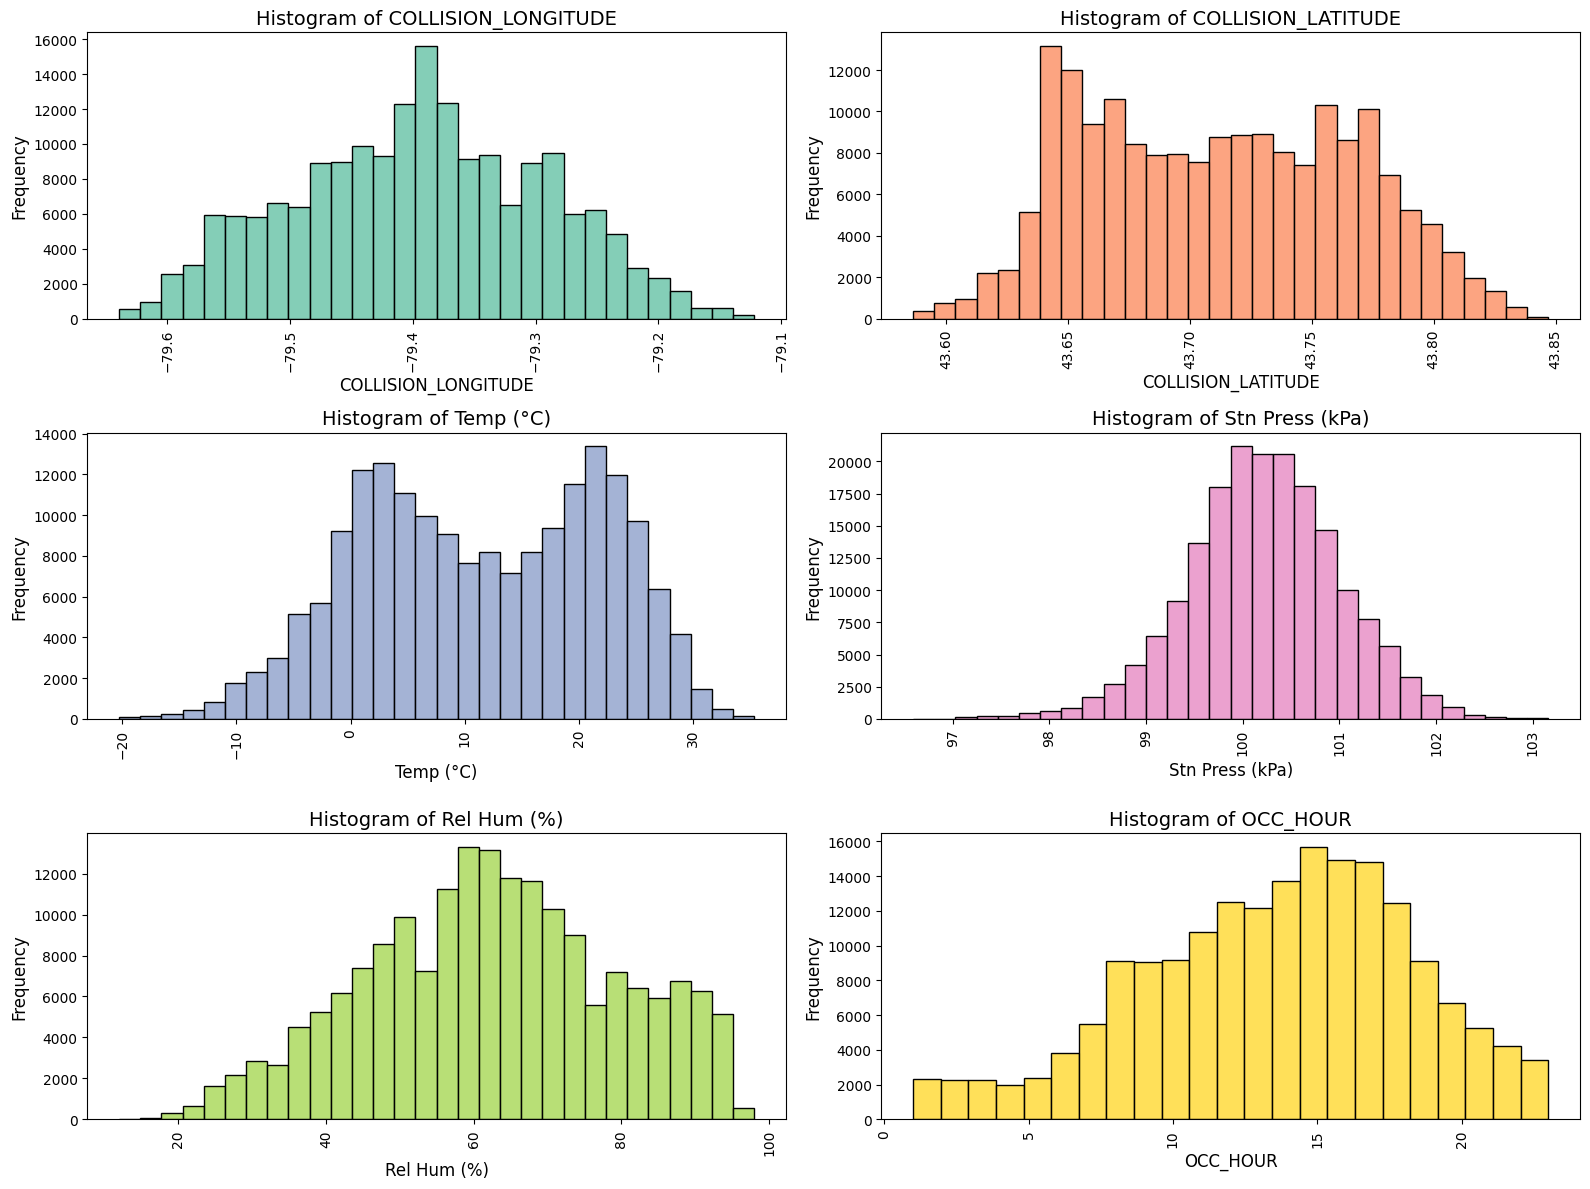

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to plot
columns_to_plot = ['COLLISION_LONGITUDE', 'COLLISION_LATITUDE', 'Temp (°C)', 'Stn Press (kPa)', 'Rel Hum (%)', 'OCC_HOUR']

# Fun color palette
colors = sns.color_palette("Set2", len(columns_to_plot))

# Set up the plot size
plt.figure(figsize=(16, 12))

# Loop through each column and create a subplot
for i, (column, color) in enumerate(zip(columns_to_plot, colors), 1):
    plt.subplot(3, 2, i)  # Adjust the grid layout
    # Drop NaN values to avoid errors
    data = Toronto_Collisions_df[column].dropna()

    # Use a dynamic bin range based on data distribution
    bins = 30 if len(data.unique()) > 30 else len(data.unique())

    # Plot the histogram with smaller bins
    sns.histplot(data, bins=bins, kde=False, color=color, alpha=0.8)

    # Set titles and labels
    plt.title(f"Histogram of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)


    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


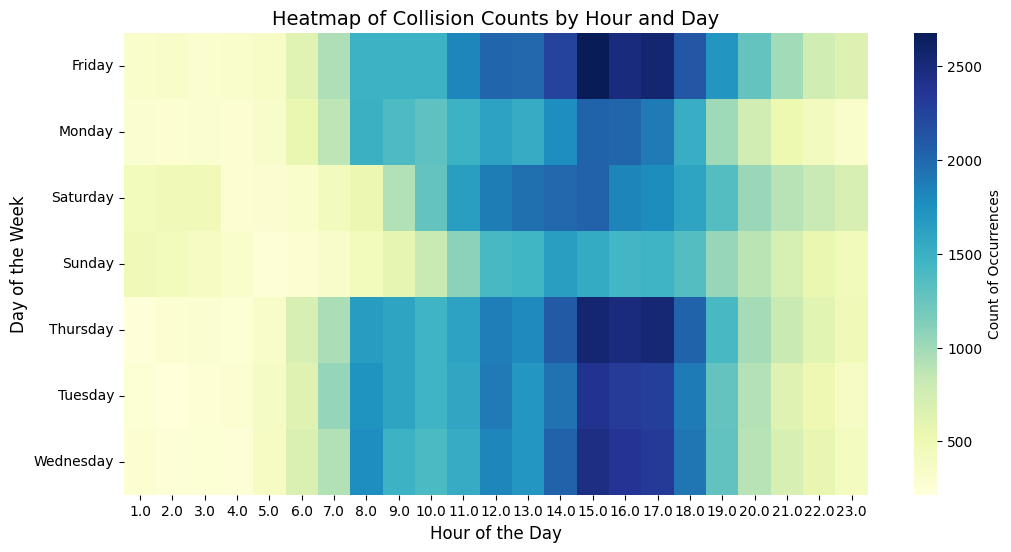

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to count occurrences for each combination of OCC_DOW and OCC_HOUR
heatmap_data = Toronto_Collisions_df.pivot_table(
    index='OCC_DOW',  # Days of the week as rows
    columns='OCC_HOUR',  # Hours of the day as columns
    aggfunc='size',  # Count the occurrences
    fill_value=0  # Replace NaN with 0 for missing combinations
)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    fmt='d',  # Integer formatting
    cmap="YlGnBu",  # Heatmap color scheme
    cbar_kws={'label': 'Count of Occurrences'}  # Label for the color bar
)

# Add titles and labels
plt.title('Heatmap of Collision Counts by Hour and Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Show the plot
plt.show()


# K-Means: Choosing Collision Locations For Developing Optimization Model

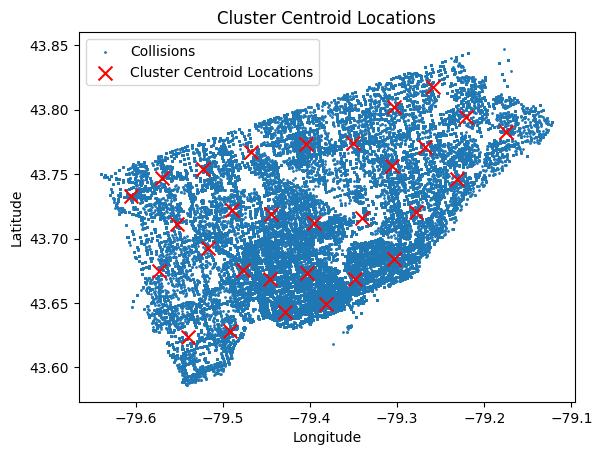

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#Extract relevant collision coordinates
coords = Toronto_Collisions_df[['COLLISION_LONGITUDE', 'COLLISION_LATITUDE']].values

#Run KMeans clustering
n_clusters = 30  #Needs hyperparam tuning
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(coords)

#Get cluster centers as candidate locations
cluster_centers = kmeans.cluster_centers_

#Convert to DataFrame for convenience
candidate_locations = pd.DataFrame(cluster_centers, columns=['longitude', 'latitude'])

#Plotting to visualize the selected points
plt.scatter(Toronto_Collisions_df['COLLISION_LONGITUDE'], Toronto_Collisions_df['COLLISION_LATITUDE'], s=1, label='Collisions')
plt.scatter(candidate_locations['longitude'], candidate_locations['latitude'], color='red', marker='x', s=100, label='Cluster Centroid Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Centroid Locations')
plt.legend()
plt.show()


# KDE

In [ ]:
# # Get longitude and latitude from your DataFrame
# lon = Toronto_Collisions_df['COLLISION_LONGITUDE'].values
# lat = Toronto_Collisions_df['COLLISION_LATITUDE'].values

# # Stack longitude and latitude into a 2D array
# coords = np.vstack([lon, lat]).T

# # Initialize and fit KDE model
# kde = KernelDensity(bandwidth=0.01, kernel='gaussian')  # Adjust bandwidth as needed
# kde.fit(coords)

# # Define grid boundaries
# min_lon, max_lon = lon.min(), lon.max()
# min_lat, max_lat = lat.min(), lat.max()

# # Create a grid of points within these boundaries
# xgrid = np.linspace(min_lon, max_lon, 100)
# ygrid = np.linspace(min_lat, max_lat, 100)
# X, Y = np.meshgrid(xgrid, ygrid)
# grid_coords = np.vstack([X.ravel(), Y.ravel()]).T

# # Evaluate KDE on the grid points
# Z = np.exp(kde.score_samples(grid_coords))  # Convert log-density to density
# Z = Z.reshape(X.shape)

# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# # Plot KDE heatmap
# plt.imshow(np.rot90(Z), cmap='viridis', extent=[min_lon, max_lon, min_lat, max_lat])
# plt.colorbar(label='Collision Density')

# # Overlay original collision points
# plt.scatter(lon, lat, s=1, color='red', alpha=0.5, label='Collisions')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Collision Density in Toronto')
# plt.legend()
# plt.show()



In [ ]:
# # Import required libraries
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.neighbors import KernelDensity

# # Check if basemap is available for background map
# try:
#     from mpl_toolkits.basemap import Basemap
#     basemap = True
# except ImportError:
#     basemap = False

# # Assume `Toronto_Collisions_df` is your DataFrame with columns for longitude and latitude
# # Extract latitude and longitude, converting them to radians for haversine calculation
# lon = Toronto_Collisions_df['COLLISION_LONGITUDE'].values * np.pi / 180
# lat = Toronto_Collisions_df['COLLISION_LATITUDE'].values * np.pi / 180

# # Stack coordinates for KDE input
# coords = np.vstack([lat, lon]).T

# # Define a function to create a grid based on the boundaries of the data
# def construct_grids(lat, lon, num_points=100):
#     """Construct a latitude/longitude grid based on data bounds."""
#     lat_min, lat_max = lat.min(), lat.max()
#     lon_min, lon_max = lon.min(), lon.max()

#     # Create the grid
#     lat_grid = np.linspace(lat_min, lat_max, num_points)
#     lon_grid = np.linspace(lon_min, lon_max, num_points)
#     return np.meshgrid(lon_grid, lat_grid)

# # Construct grid for the collision data area
# X, Y = construct_grids(lat, lon)

# # Flatten grid points for KDE evaluation and stack them
# xy = np.vstack([Y.ravel(), X.ravel()]).T

# # Create KDE model with Haversine metric
# kde = KernelDensity(bandwidth=0.01, metric="haversine", kernel="gaussian", algorithm="ball_tree")
# kde.fit(coords)

# # Evaluate the KDE model on the grid
# Z = np.exp(kde.score_samples(xy))  # Convert log-density to density
# Z = Z.reshape(X.shape)

# # Plot the KDE on the map
# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot density as a filled contour plot
# levels = np.linspace(0, Z.max(), 25)
# density_plot = ax.contourf(X * 180 / np.pi, Y * 180 / np.pi, Z, levels=levels, cmap='Reds')

# # Add color bar
# plt.colorbar(density_plot, label="Collision Density")

# # Overlay collision points for reference
# plt.scatter(lon * 180 / np.pi, lat * 180 / np.pi, s=1, color='blue', alpha=0.3, label="Collisions")

# # Add basemap if available
# if basemap:
#     m = Basemap(
#         projection='merc',
#         llcrnrlat=lat.min() * 180 / np.pi, urcrnrlat=lat.max() * 180 / np.pi,
#         llcrnrlon=lon.min() * 180 / np.pi, urcrnrlon=lon.max() * 180 / np.pi,
#         resolution='i', ax=ax
#     )
#     m.drawcoastlines()
#     m.drawcountries()
#     m.drawmapboundary(fill_color='aqua')
#     m.fillcontinents(color='lightgray', lake_color='aqua')
# else:
#     # If Basemap isn't available, add simple labels and a basic coastline
#     plt.xlabel("Longitude")
#     plt.ylabel("Latitude")

# plt.title("Toronto Collision Density")
# plt.legend()
# plt.show()


In [ ]:
import folium
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from folium.plugins import HeatMap

# Assuming you have Toronto_Collisions_df DataFrame with 'COLLISION_LATITUDE' and 'COLLISION_LONGITUDE'

# Extract latitude and longitude values
lon = Toronto_Collisions_df['COLLISION_LONGITUDE'].values
lat = Toronto_Collisions_df['COLLISION_LATITUDE'].values
coords = np.vstack([lat, lon]).T  # Stack lat/lon for KDE input

# Fit KDE with scikit-learn
kde = KernelDensity(bandwidth=0.01, metric='haversine', kernel='gaussian')
kde.fit(np.radians(coords))  # KDE needs radian coordinates for haversine distance

# Define grid for KDE evaluation (around Toronto area)
lat_min, lat_max = lat.min(), lat.max()
lon_min, lon_max = lon.min(), lon.max()
lat_grid = np.linspace(lat_min, lat_max, 100)
lon_grid = np.linspace(lon_min, lon_max, 100)
X, Y = np.meshgrid(lon_grid, lat_grid)
grid_coords = np.vstack([Y.ravel(), X.ravel()]).T

# Convert grid coordinates to radians for KDE scoring
grid_coords_rad = np.radians(grid_coords)

# Evaluate KDE on grid coordinates
Z = np.exp(kde.score_samples(grid_coords_rad))  # Log-density to density
Z = Z.reshape(X.shape)

# Normalize Z values for better color intensity on the Folium map
Z_normalized = (Z - Z.min()) / (Z.max() - Z.min())

# Prepare data for HeatMap plugin in Folium
heat_data = []
for i in range(len(lat_grid)):
    for j in range(len(lon_grid)):
        # Only add points with significant density values for better performance
        if Z_normalized[i, j] > 0.1:
            heat_data.append([lat_grid[i], lon_grid[j], Z_normalized[i, j]])

# Initialize Folium map centered around Toronto
m = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=12)

# Add heatmap layer
HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

# Display map
m.save("Toronto_Collision_Density_Map.html")
m


In [ ]:
import folium
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from folium.plugins import HeatMap

# Set up the KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.005)  # Adjust bandwidth as needed

# Fit the KDE model to your collision data
collision_coords = Toronto_Collisions_df[['COLLISION_LONGITUDE', 'COLLISION_LATITUDE']].values
kde.fit(collision_coords)

# Generate a grid that matches the actual extent of Toronto
longitude_min, longitude_max = Toronto_Collisions_df['COLLISION_LONGITUDE'].min(), Toronto_Collisions_df['COLLISION_LONGITUDE'].max()
latitude_min, latitude_max = Toronto_Collisions_df['COLLISION_LATITUDE'].min(), Toronto_Collisions_df['COLLISION_LATITUDE'].max()

# Define a higher-resolution grid for smooth results
grid_longitude, grid_latitude = np.mgrid[longitude_min:longitude_max:200j, latitude_min:latitude_max:200j]

# Evaluate the KDE over the grid points
grid_coords = np.vstack([grid_longitude.ravel(), grid_latitude.ravel()]).T
density = np.exp(kde.score_samples(grid_coords))

# Reshape the density values to match the grid shape
density = density.reshape(grid_longitude.shape)

# Prepare data for the heatmap by creating a DataFrame
grid_data = pd.DataFrame({
    'longitude': grid_longitude.ravel(),
    'latitude': grid_latitude.ravel(),
    'density': density.ravel()
})

# Create a Folium map centered on the average location in Toronto
m = folium.Map(location=[Toronto_Collisions_df['COLLISION_LATITUDE'].mean(), Toronto_Collisions_df['COLLISION_LONGITUDE'].mean()], zoom_start=12)

# Plot the heatmap with adjusted parameters
HeatMap(
    data=grid_data[['latitude', 'longitude', 'density']].values.tolist(),
    radius=10,              # Adjust for smoothness
    blur=15,                # Adjust for smoothness
    max_val=density.max(),  # Scale by max density
    min_opacity=0.3,
    gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
).add_to(m)

# Save or display the map
m.save('collision_kde_map.html')


In [ ]:
m

In [ ]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs):
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins,
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)






In [ ]:
import folium
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from folium.plugins import HeatMap

# KDE setup with custom grid, assuming `Toronto_Collisions_df` contains your data
collision_coords = Toronto_Collisions_df[['COLLISION_LONGITUDE', 'COLLISION_LATITUDE']].values
kde = KernelDensity(kernel='gaussian', bandwidth=0.005).fit(collision_coords)

# Create grid of points
longitude_min, longitude_max = collision_coords[:, 0].min(), collision_coords[:, 0].max()
latitude_min, latitude_max = collision_coords[:, 1].min(), collision_coords[:, 1].max()
x_grid, y_grid = np.mgrid[longitude_min:longitude_max:200j, latitude_min:latitude_max:200j]
grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()]).T

# Calculate density at each grid point and normalize for color mapping
density = np.exp(kde.score_samples(grid_coords))
density_normalized = density / density.max()

# Prepare data for HeatMap as list of [lat, lon, intensity]
heat_data = [
    [lat, lon, density]
    for (lon, lat), density in zip(grid_coords, density_normalized)
]

# Create a Folium map centered on Toronto
m = folium.Map(location=[43.651070, -79.347015], zoom_start=12)

# Add heatmap with custom radius and blur for smoother appearance
HeatMap(
    heat_data,
    min_opacity=0.2,
    max_opacity=0.8,
    radius=15,  # Adjust radius and blur for smoothness
    blur=20,    # Higher blur creates smoother transitions
    gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
).add_to(m)

# Save or display the map
m.save('toronto_smooth_density_heatmap.html')
m


# Heatmap (Implicit KDE)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve

# Define the grid over the area
longitude_min, longitude_max = Toronto_Collisions_df['COLLISION_LONGITUDE'].min(), Toronto_Collisions_df['COLLISION_LONGITUDE'].max()
latitude_min, latitude_max = Toronto_Collisions_df['COLLISION_LATITUDE'].min(), Toronto_Collisions_df['COLLISION_LATITUDE'].max()

# Generate a grid for the heatmap
grid_size = 200  # Adjust for resolution
x_grid = np.linspace(longitude_min, longitude_max, grid_size)
y_grid = np.linspace(latitude_min, latitude_max, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)

# Compute density at each grid point (simplified example, can use KDE or binning)
heatmap, _, _ = np.histogram2d(
    Toronto_Collisions_df['COLLISION_LONGITUDE'],
    Toronto_Collisions_df['COLLISION_LATITUDE'],
    bins=[x_grid, y_grid]
)

# Smooth the heatmap using Gaussian convolution
gaussian_kernel = Gaussian2DKernel(x_stddev=2, y_stddev=2)  # Adjust x_stddev and y_stddev for smoothness level
smoothed_heatmap = convolve(heatmap.T, gaussian_kernel)

# Display the density map with transparency
plt.figure(figsize=(15,15))
plt.imshow(smoothed_heatmap, extent=[longitude_min, longitude_max, latitude_min, latitude_max],
           origin='lower', cmap='hot', alpha=0.7)  # Set alpha for transparency
plt.colorbar(label='Collision Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto Collision Density Map')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Define the grid over the area
longitude_min, longitude_max = Toronto_Collisions_df['COLLISION_LONGITUDE'].min(), Toronto_Collisions_df['COLLISION_LONGITUDE'].max()
latitude_min, latitude_max = Toronto_Collisions_df['COLLISION_LATITUDE'].min(), Toronto_Collisions_df['COLLISION_LATITUDE'].max()

# Generate a grid of points for the heatmap
grid_size = 200  # Adjust grid size for resolution
x_grid = np.linspace(longitude_min, longitude_max, grid_size)
y_grid = np.linspace(latitude_min, latitude_max, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)
grid_coords = np.vstack([X.ravel(), Y.ravel()]).T  # Flatten the grid for input to KDE

# Fit KDE model to the collision data
kde = KernelDensity(kernel='gaussian', bandwidth=0.01)  # Adjust bandwidth for smoothness
kde.fit(Toronto_Collisions_df[['COLLISION_LONGITUDE', 'COLLISION_LATITUDE']])

# Evaluate KDE on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(X.shape)  # Reshape to grid

# Plot the KDE density map
plt.imshow(density, extent=[longitude_min, longitude_max, latitude_min, latitude_max],
           origin='lower', cmap='hot', alpha=0.7)
plt.colorbar(label='Collision Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto Collision Density Map (KDE)')
plt.show()


TEST!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from matplotlib.colors import LinearSegmentedColormap

# Define the grid over the area
longitude_min, longitude_max = Toronto_Collisions_df['COLLISION_LONGITUDE'].min(), Toronto_Collisions_df['COLLISION_LONGITUDE'].max()
latitude_min, latitude_max = Toronto_Collisions_df['COLLISION_LATITUDE'].min(), Toronto_Collisions_df['COLLISION_LATITUDE'].max()

# Generate a grid of points for the heatmap
grid_size = 200  # Adjust grid size for resolution
x_grid = np.linspace(longitude_min, longitude_max, grid_size)
y_grid = np.linspace(latitude_min, latitude_max, grid_size)
X, Y = np.meshgrid(x_grid, y_grid)
grid_coords = np.vstack([X.ravel(), Y.ravel()]).T  # Flatten the grid for input to KDE

# Fit KDE model to the collision data
kde = KernelDensity(kernel='gaussian', bandwidth=0.01)  # Adjust bandwidth for smoothness
kde.fit(Toronto_Collisions_df[['COLLISION_LONGITUDE', 'COLLISION_LATITUDE']])

# Evaluate KDE on the grid
log_density = kde.score_samples(grid_coords)
density = np.exp(log_density).reshape(X.shape)  # Reshape to grid

# Define a custom colormap: blue (low), green, yellow, orange, red (high)
colors = ["white", "green", "yellow", "orange", "red"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Plot the KDE density map with the custom colormap
plt.imshow(density, extent=[longitude_min, longitude_max, latitude_min, latitude_max],
           origin='lower', cmap=cmap, alpha=0.7)
plt.colorbar(label='Collision Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto Collision Density Map (KDE)')
plt.show()


In [ ]:
density.shape

Plot Chosen Ambulance

In [ ]:
from folium.plugins import HeatMap

# Read CSV and create map
toronto_map = folium.Map(location=[43.6532, -79.3832], zoom_start=12)

# Create a HeatMap layer using KDE to visualize tree density
collision_data = Toronto_Collisions_df[['COLLISION_LATITUDE', 'COLLISION_LONGITUDE']].values.tolist()
HeatMap(collision_data, radius = 15, blur = 20,).add_to(toronto_map)

# Array of coordinates
KDE_ambulance_locations =  [
    (43.680105, -79.430752),  # Latitude, Longitude
    (43.656825, -79.404782),
    (43.659371, -79.364854)
]

LR_ambulance_locations =  [
    (43.628019, -79.502938),
    (43.694520, -79.441141),
    (43.745814, -79.346726),
    (43.726217, -79.402157),
    (43.764644, -79.227788),
    (43.777392, -79.148066)
]

RF_ambulance_locations =  [
    (43.628019, -79.502938),
    (43.694520, -79.441141),
    (43.777392, -79.148066)
]


# Plot points as dots using Marker or CircleMarker
for lat, lon in KDE_ambulance_locations:
    folium.CircleMarker(
        location=[lat, lon],  # Latitude and longitude
        radius=5,  # Size of the dot
        color='blue',  # Color of the dot
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(toronto_map)


# Plot points as dots using Marker or CircleMarker
for lat, lon in LR_ambulance_locations:
    folium.CircleMarker(
        location=[lat, lon],  # Latitude and longitude
        radius=5,  # Size of the dot
        color='black',  # Color of the dot
        fill=True,
        fill_color='black',
        fill_opacity=0.6
    ).add_to(toronto_map)

# Save HeatMap
toronto_map.save('toronto_collision_map.html')

In [ ]:
toronto_map

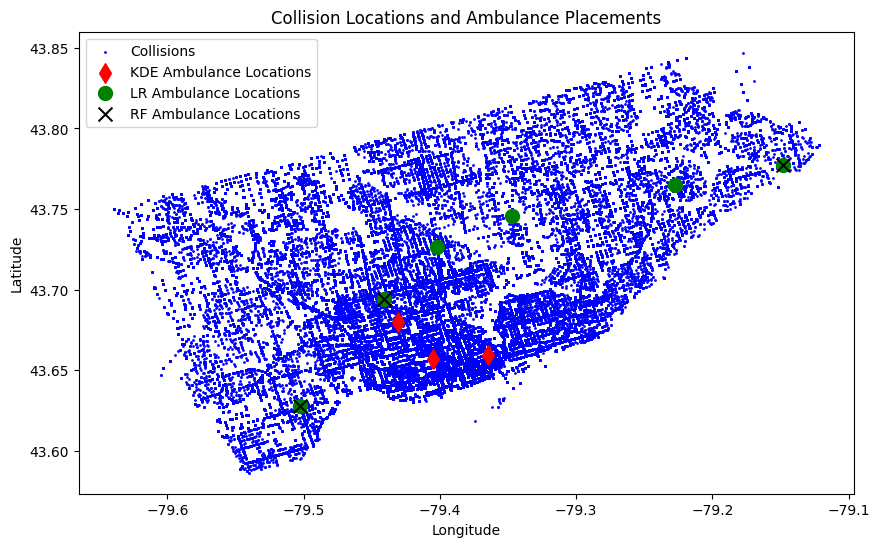

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant collision coordinates
coords = Toronto_Collisions_df[['COLLISION_LONGITUDE', 'COLLISION_LATITUDE']].values

# Array of coordinates
KDE_ambulance_locations =  [
    (43.680105, -79.430752),  # Latitude, Longitude
    (43.656825, -79.404782),
    (43.659371, -79.364854)
]

LR_ambulance_locations =  [
    (43.628019, -79.502938),
    (43.694520, -79.441141),
    (43.745814, -79.346726),
    (43.726217, -79.402157),
    (43.764644, -79.227788),
    (43.777392, -79.148066)
]

RF_ambulance_locations =  [
    (43.628019, -79.502938),
    (43.694520, -79.441141),
    (43.777392, -79.148066)
]


# Plotting to visualize the selected points
plt.figure(figsize=(10, 6))

# Plot the collision locations
plt.scatter(Toronto_Collisions_df['COLLISION_LONGITUDE'],
            Toronto_Collisions_df['COLLISION_LATITUDE'],
            s=1, color='blue', label='Collisions')

# Plot KDE ambulance locations (in red)
kde_lats, kde_lons = zip(*KDE_ambulance_locations)
plt.scatter(kde_lons, kde_lats, color='red', marker='d', s=100, label='KDE Ambulance Locations')

# Plot LR ambulance locations (in black)
lr_lats, lr_lons = zip(*LR_ambulance_locations)
plt.scatter(lr_lons, lr_lats, color='green', marker='o', s=100, label='LR Ambulance Locations')

# Plot LR/RFC ambulance locations (in black)
rf_lats, rf_lons = zip(*RF_ambulance_locations)
plt.scatter(rf_lons, rf_lats, color='black', marker='x', s=100, label='RF Ambulance Locations')

# Adding labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Collision Locations and Ambulance Placements')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Get the count of each unique value in the 'CLASSIFICATION' column
classification_counts = Toronto_Collisions_df['INTERSECTION_CLASSIFICATION'].value_counts()

# Calculate the proportion of each type
classification_proportions = classification_counts / len(Toronto_Collisions_df)

# Display the counts and proportions
print("Counts of each classification:\n", classification_counts)
print("\nProportions of each classification:\n", classification_proportions)


Counts of each classification:
 INTERSECTION_CLASSIFICATION
MNRSL    133762
MJRSL     33809
SEUML      8564
SEUSL      2477
MJRML      1772
XICSL      1168
MNRML      1028
LSRSL       967
CDSSL        38
LSRML        32
Name: count, dtype: int64

Proportions of each classification:
 INTERSECTION_CLASSIFICATION
MNRSL    0.728484
MJRSL    0.184128
SEUML    0.046641
SEUSL    0.013490
MJRML    0.009651
XICSL    0.006361
MNRML    0.005599
LSRSL    0.005266
CDSSL    0.000207
LSRML    0.000174
Name: count, dtype: float64
